In [1]:
import numpy as np
from IPython.display import HTML
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from sklearn.cluster import KMeans
from sklearn import datasets

Note: To be able to play video in the notebook you must have 'ffmpeg' installed first!

Otherwise you can run 'animation_script.py' outside of the notebook

In [118]:
# A manual implementation of k-means from the example at: 
# https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html

def kmeans_iris(k=3, feats_idx=[3,0,2], np_seed=10):

    np.random.seed(np_seed)

    iris = datasets.load_iris()
    X = iris.data
    y = iris.target

    X3d = X[:,feats_idx]
    X2d = X[:,feats_idx[:2]]

    np.random.seed(10)

    # Initializing means:
    centroids_3d = np.zeros((k, X3d.shape[-1]))
    for dim in range(X3d.shape[1]):
        centroids_3d[:,dim] = np.random.choice(X3d[:,dim], k)

    centroids_2d = np.zeros((k, X2d.shape[-1]))
    for dim in range(X2d.shape[-1]):
        centroids_2d[:,dim] = np.random.choice(X2d[:,dim], k)

    def animate(i):

        ax1.clear()
        ax2.clear()

        X3d_dists = np.expand_dims(X3d, axis=1)-np.expand_dims(centroids_3d, axis=0)
        X3d_dists_euc = np.sqrt(np.sum(X3d_dists**2, axis=-1))
        samples_assignments_3d = np.argmin(X3d_dists_euc, axis=-1)
        for ki in range(k):
            centroids_3d[ki,:] = np.mean(X3d[samples_assignments_3d==ki,:], axis=0)
        ax1.scatter(X3d[:, 0], X3d[:, 1], X3d[:, 2],
                   c=samples_assignments_3d.astype(np.float))
        ax1.scatter(centroids_3d[:, 0], centroids_3d[:, 1], centroids_3d[:, 2],
                   c=np.arange(centroids_3d.shape[0]).astype(np.float), edgecolor='k', marker='X', s=100)

        ax1.w_xaxis.set_ticklabels([])
        ax1.w_yaxis.set_ticklabels([])
        ax1.w_zaxis.set_ticklabels([])
        ax1.set_xlabel(iris.feature_names[3][:-5])
        ax1.set_ylabel(iris.feature_names[0][:-5])
        ax1.set_zlabel(iris.feature_names[2][:-5])
        ax1.view_init(elev=48, azim=134)
        ax1.set_title('3D Iteratoin: %i' %i+1)

        X2d_dists = np.expand_dims(X2d, axis=1)-np.expand_dims(centroids_2d, axis=0)
        X2d_dists_euc = np.sqrt(np.sum(X2d_dists**2, axis=-1))
        samples_assignments_2d = np.argmin(X2d_dists_euc, axis=-1)
        for ki in range(k):
            centroids_2d[ki,:] = np.mean(X2d[samples_assignments_2d==ki,:], axis=0)
        ax2.scatter(X2d[:, 0], X2d[:, 1],
                   c=samples_assignments_2d.astype(np.float))
        ax2.scatter(centroids_2d[:, 0], centroids_2d[:, 1],
                   c=np.arange(centroids_2d.shape[0]).astype(np.float), edgecolor='k', marker='X', s=100)

        ax2.set_xticklabels([])
        ax2.set_yticklabels([])
        ax2.set_xlabel(iris.feature_names[3][:-5])
        ax2.set_ylabel(iris.feature_names[0][:-5])
        ax2.set_title('2D Iteratoin: %i' %i+1)

    fig = plt.figure(figsize=(10, 9))
    ax1 = fig.add_subplot(2,2,1, projection='3d')
    ax2 = fig.add_subplot(2,2,2)

    ax3 = fig.add_subplot(2,2,3, projection='3d')
    for name, label in [('Setosa', 0),
                        ('Versicolour', 1),
                        ('Virginica', 2)]:
        ax3.text3D(X3d[y == label, 0].mean(),
                   X3d[y == label, 1].mean(),
                   X3d[y == label, 2].mean() + 2, name,
                   horizontalalignment='center',
                   bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))

    # Reorder the labels to have colors matching the cluster results
    y_reordered = np.choose(y, [1, 0, 2]).astype(np.float)
    ax3.scatter(X3d[:, 0], X3d[:, 1], X3d[:, 2], c=y_reordered, edgecolor='k')

    ax3.w_xaxis.set_ticklabels([])
    ax3.w_yaxis.set_ticklabels([])
    ax3.w_zaxis.set_ticklabels([])
    ax3.set_xlabel(iris.feature_names[3][:-5])
    ax3.set_ylabel(iris.feature_names[0][:-5])
    ax3.set_zlabel(iris.feature_names[2][:-5])
    ax3.view_init(elev=48, azim=134)
    ax3.set_title('3D Ground Truth')

    ax4 = fig.add_subplot(2,2,4)
    for name, label in [('Setosa', 0),
                        ('Versicolour', 1),
                        ('Virginica', 2)]:
        ax4.text(X2d[y == label, 0].mean(),
                 X2d[y == label, 1].mean() + 1, name,
                 bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
    # Reorder the labels to have colors matching the cluster results
    # y = np.choose(y, [1, 2, 0]).astype(np.float)
    ax4.scatter(X2d[:, 0], X2d[:, 1], c=y, edgecolor='k')
    
    ax4.set_xticklabels([])
    ax4.set_yticklabels([])
    ax4.set_xlabel(iris.feature_names[3][:-5])
    ax4.set_ylabel(iris.feature_names[0][:-5])
    ax4.set_title('2D Ground Truth')

    fig.tight_layout()
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    anim = FuncAnimation(fig, animate, frames=10, repeat=False, interval=1000)

#     plt.show()
    
    return anim

-------------


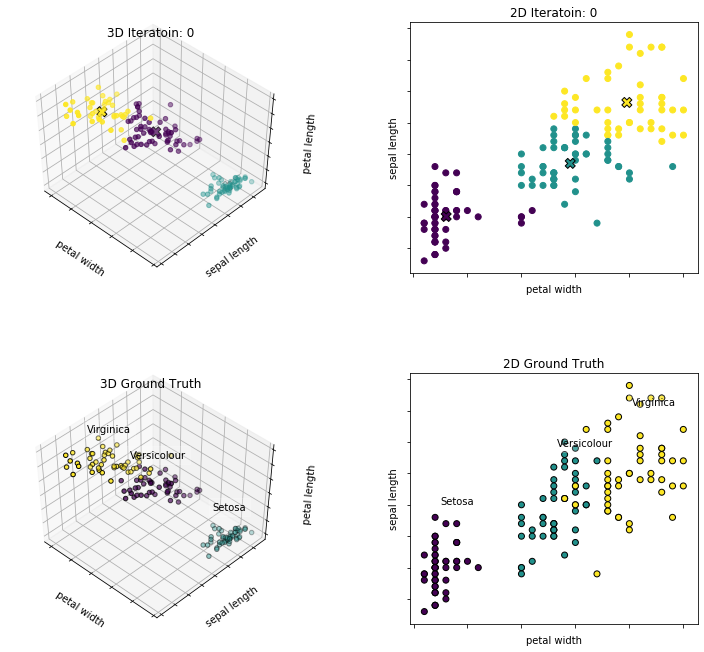

In [120]:
anim = kmeans_iris(k=3, np_seed=300)
print('-------------')
HTML(anim.to_html5_video())